# Prueba Técnica DS

El proposito de esta prueba técnica es comprobar si el candidato posee conocimientos de Python (aplicados a ML). Desde Python 3, aconsejamos usar las siguientes librerias (salvo que se indique lo contrario): **numpy, pandas, matplotlib**



## Bloque 1. Exploración de Datos


Se dispone de un conjunto de datos que contiene observaciones de vuelos nacionales estadounidenses en 2023, almacenado en el fichero vuelos.csv,  que consta de los siguientes campos:

* Fecha: La fecha del vuelo, en formato YYYY-MM-DD
* Compañía: La abreviatura de dos letras de la compañía aérea.
* AeropuertoOrigenID: Identificador numérico único del aeropuerto de salida.
* AeropuertoOrigen: El nombre completo del aeropuerto de salida
* AeropuertoDestinoID: Identificador numérico único del aeropuerto de destino
* AeropuertoDestino: El nombre completo del aeropuerto de destino
* HoraSalidaProgramada: La hora de salida programada
* RetrasoSalida: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
* SalidaTarde: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* HoraLlegadaProgramada: La hora de llegada programada
* RetrasoLlegada: El número de minutos que se retrasó la llegada (el vuelo que llegó antes de lo previsto tiene un valor negativo)
* LlegadaTarde: Un indicador binario de que la llegada se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* Cancelado: Un indicador binario que indica si l vuelo fue cancelado

## El reto consiste en explorar los datos de los vuelos para analizar los posibles factores que afectan a los retrasos en la salida o llegada.

### 2.1 Empezaremos por limpiar los datos.
* Identifica cualquier dato nulo o faltante, y tratalo convenientemente.
* Identifica y elimina cualquier valor atípico (outliers) en las columnas que determinan los retrasos de llegada y salida.
### 2.2 Utilice estadísticas, funciones de agregación y visualizaciones para responder a las siguientes preguntas:
* ¿Cuáles son los retrasos medios de salida y llegada?
* ¿Cómo se comportan las compañías aéreas en cuanto a los retrasos de llegada y salida medios se refiere?
* ¿Qué aeropuerto tiene el mayor número de retrasos de salida?
* ¿Podemos concluir que las salidas con retraso suelen provocar mayores retrasos en las llegadas que las salidas puntuales? ¿Existe una correlación?
* ¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?

<font color="#9E1B32">**(Justifica y explica todas tus respuestas y acciones, con comentarios apropiados.)**</font>



## Resolución de ejercicio


In [1]:
#Cargamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga del dataset guardado en local
df = pd.read_csv(r"C:\Users\Juan Carlos\Documents\Prueba tecnica LIS\vuelos.csv")
df

,Fecha,Compañía,AeropuertoOrigenID,AeropuertoOrigen,AeropuertoDestinoID,AeropuertoDestino,HoraSalidaProgramada,RetrasoSalida,SalidaTarde,HoraLlegadaProgramada,RetrasoLlegada,LlegadaTarde,Cancelado
0,2023-09-16,DL,15304,Tampa International,12478,John F. Kennedy International,1539,4,0.0,1824,13,0,0
1,2023-09-23,WN,14122,Pittsburgh International,13232,Chicago Midway International,710,3,0.0,740,22,1,0
2,2023-09-07,AS,14747,Seattle/Tacoma International,11278,Ronald Reagan Washington National,810,-3,0.0,1614,-7,0,0
3,2023-07-22,OO,13930,Chicago O'Hare International,11042,Cleveland-Hopkins International,804,35,1.0,1027,33,1,0
4,2023-05-16,DL,13931,Norfolk International,10397,Hartsfield-Jackson Atlanta International,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2023-09-20,VX,13204,Orlando International,12892,Los Angeles International,1730,1,0.0,1945,18,1,0
271936,2023-04-19,FL,10397,Hartsfield-Jackson Atlanta International,11697,Fort Lauderdale-Hollywood International,1020,24,1.0,1218,61,1,0
271937,2023-10-26,WN,12191,William P Hobby,10821,Baltimore/Washington International Thurgood Ma...,1540,30,1.0,1935,15,1,0
271938,2023-05-07,HA,13830,Kahului Airport,12173,Honolulu International,609,-5,0.0,641,-6,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Fecha                  271940 non-null  object 
 1   Compañía               271940 non-null  object 
 2   AeropuertoOrigenID     271940 non-null  int64  
 3   AeropuertoOrigen       271940 non-null  object 
 4   AeropuertoDestinoID    271940 non-null  int64  
 5   AeropuertoDestino      271940 non-null  object 
 6   HoraSalidaProgramada   271940 non-null  int64  
 7   RetrasoSalida          271940 non-null  int64  
 8   SalidaTarde            269179 non-null  float64
 9   HoraLlegadaProgramada  271940 non-null  int64  
 10  RetrasoLlegada         271940 non-null  int64  
 11  LlegadaTarde           271940 non-null  int64  
 12  Cancelado              271940 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 27.0+ MB


### 2.1 Limpieza de datos

In [4]:
## Identificamos cualquier dato nulo o faltante y lo tratamos convenientemente.
df.isnull().sum()

Fecha                       0
Compañía                    0
AeropuertoOrigenID          0
AeropuertoOrigen            0
AeropuertoDestinoID         0
AeropuertoDestino           0
HoraSalidaProgramada        0
RetrasoSalida               0
SalidaTarde              2761
HoraLlegadaProgramada       0
RetrasoLlegada              0
LlegadaTarde                0
Cancelado                   0
dtype: int64

In [5]:
#Vemos si hay valores duplicados
df.duplicated().sum()

0

In [6]:
df[df.isnull().any(axis=1)]

,Fecha,Compañía,AeropuertoOrigenID,AeropuertoOrigen,AeropuertoDestinoID,AeropuertoDestino,HoraSalidaProgramada,RetrasoSalida,SalidaTarde,HoraLlegadaProgramada,RetrasoLlegada,LlegadaTarde,Cancelado
171,2023-04-18,DL,10397,Hartsfield-Jackson Atlanta International,13930,Chicago O'Hare International,835,0,NaN,945,0,1,1
359,2023-05-22,OO,11433,Detroit Metro Wayne County,13930,Chicago O'Hare International,1719,0,NaN,1738,0,1,1
429,2023-07-03,MQ,13851,Will Rogers World,13930,Chicago O'Hare International,1935,0,NaN,2125,0,1,1
545,2023-04-13,FL,14524,Richmond International,10397,Hartsfield-Jackson Atlanta International,630,0,NaN,809,0,1,1
554,2023-05-08,EV,12953,LaGuardia,11193,Cincinnati/Northern Kentucky International,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2023-08-05,WN,14831,Norman Y. Mineta San Jose International,10800,Bob Hope,1525,0,NaN,1625,0,1,1
271607,2023-06-18,EV,14100,Philadelphia International,13244,Memphis International,600,0,NaN,729,0,1,1
271634,2023-05-08,AA,11298,Dallas/Fort Worth International,14100,Philadelphia International,1325,0,NaN,1745,0,1,1
271671,2023-10-08,WN,12892,Los Angeles International,12889,McCarran International,1440,0,NaN,1540,0,1,1


In [7]:
#Como están cancelados no influyen en los retrasos por lo que procedemos a eliminarlos que además coinciden con los valores nulos que hemos visto anterioremnte y alguno más
df = df.loc[df["Cancelado"] != 1]
df

,Fecha,Compañía,AeropuertoOrigenID,AeropuertoOrigen,AeropuertoDestinoID,AeropuertoDestino,HoraSalidaProgramada,RetrasoSalida,SalidaTarde,HoraLlegadaProgramada,RetrasoLlegada,LlegadaTarde,Cancelado
0,2023-09-16,DL,15304,Tampa International,12478,John F. Kennedy International,1539,4,0.0,1824,13,0,0
1,2023-09-23,WN,14122,Pittsburgh International,13232,Chicago Midway International,710,3,0.0,740,22,1,0
2,2023-09-07,AS,14747,Seattle/Tacoma International,11278,Ronald Reagan Washington National,810,-3,0.0,1614,-7,0,0
3,2023-07-22,OO,13930,Chicago O'Hare International,11042,Cleveland-Hopkins International,804,35,1.0,1027,33,1,0
4,2023-05-16,DL,13931,Norfolk International,10397,Hartsfield-Jackson Atlanta International,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2023-09-20,VX,13204,Orlando International,12892,Los Angeles International,1730,1,0.0,1945,18,1,0
271936,2023-04-19,FL,10397,Hartsfield-Jackson Atlanta International,11697,Fort Lauderdale-Hollywood International,1020,24,1.0,1218,61,1,0
271937,2023-10-26,WN,12191,William P Hobby,10821,Baltimore/Washington International Thurgood Ma...,1540,30,1.0,1935,15,1,0
271938,2023-05-07,HA,13830,Kahului Airport,12173,Honolulu International,609,-5,0.0,641,-6,0,0


In [8]:
df.isnull().sum()

Fecha                    0
Compañía                 0
AeropuertoOrigenID       0
AeropuertoOrigen         0
AeropuertoDestinoID      0
AeropuertoDestino        0
HoraSalidaProgramada     0
RetrasoSalida            0
SalidaTarde              0
HoraLlegadaProgramada    0
RetrasoLlegada           0
LlegadaTarde             0
Cancelado                0
dtype: int64

In [9]:
## Identificamos y eliminamos cualquier valor atípico en las columnas que determinan los retrasos de llegada y salida.

In [10]:
df.columns

Index(['Fecha', 'Compañía', 'AeropuertoOrigenID', 'AeropuertoOrigen',
       'AeropuertoDestinoID', 'AeropuertoDestino', 'HoraSalidaProgramada',
       'RetrasoSalida', 'SalidaTarde', 'HoraLlegadaProgramada',
       'RetrasoLlegada', 'LlegadaTarde', 'Cancelado'],
      dtype='object')

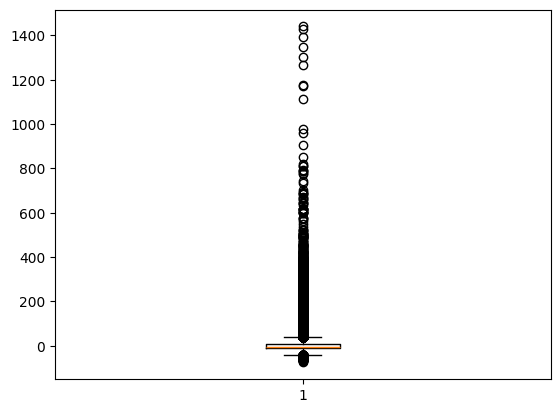

In [11]:
#Haremos boxplot tanto para las salidas como para las llegadas para ver conocer la desviación estándar de los datos 
#y qué valores se encuentran fuera.
plt.boxplot(df["RetrasoLlegada"])
plt.show()

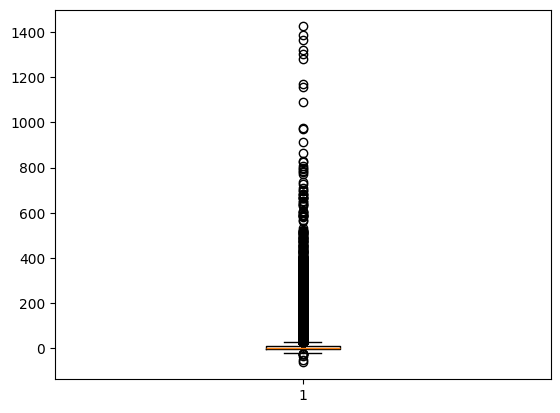

In [12]:
plt.boxplot(df["RetrasoSalida"])
plt.show()

In [13]:
# Además utilizaremos el rango intercuartilico ya que vemos que la mayoría de vuelos tienen entorno a 0 minutos de retraso
Q1 = df['RetrasoLlegada'].quantile(0.25)
Q3 = df['RetrasoLlegada'].quantile(0.75)
RIC = Q3 - Q1
outliers = df[(df['RetrasoLlegada'] < Q1 - 1.5*RIC) | (df['RetrasoLlegada'] > Q3 + 1.5*RIC)]
outliers
df=df.drop(outliers.index)

In [14]:
#Para la salida, ocurre lo mismo que para la llegada.
Q1 = df['RetrasoSalida'].quantile(0.25)
Q3 = df['RetrasoSalida'].quantile(0.75)
RIC = Q3 - Q1
outliers_salida = df[(df['RetrasoSalida'] < Q1 - 1.5*RIC) | (df['RetrasoSalida'] > Q3 + 1.5*RIC)]
df=df.drop(outliers_salida.index)
df

,Fecha,Compañía,AeropuertoOrigenID,AeropuertoOrigen,AeropuertoDestinoID,AeropuertoDestino,HoraSalidaProgramada,RetrasoSalida,SalidaTarde,HoraLlegadaProgramada,RetrasoLlegada,LlegadaTarde,Cancelado
0,2023-09-16,DL,15304,Tampa International,12478,John F. Kennedy International,1539,4,0.0,1824,13,0,0
1,2023-09-23,WN,14122,Pittsburgh International,13232,Chicago Midway International,710,3,0.0,740,22,1,0
2,2023-09-07,AS,14747,Seattle/Tacoma International,11278,Ronald Reagan Washington National,810,-3,0.0,1614,-7,0,0
4,2023-05-16,DL,13931,Norfolk International,10397,Hartsfield-Jackson Atlanta International,545,-1,0.0,728,-9,0,0
6,2023-10-06,WN,13796,Metropolitan Oakland International,12191,William P Hobby,630,-1,0.0,1210,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271932,2023-08-26,WN,11292,Denver International,12191,William P Hobby,1855,-2,0.0,2215,0,0,0
271933,2023-10-29,US,13930,Chicago O'Hare International,14100,Philadelphia International,1345,-6,0.0,1645,-11,0,0
271934,2023-04-13,AA,11298,Dallas/Fort Worth International,13204,Orlando International,1335,-7,0.0,1705,-12,0,0
271935,2023-09-20,VX,13204,Orlando International,12892,Los Angeles International,1730,1,0.0,1945,18,1,0


In [15]:
# Es verdad que es probable que haya vuelos que se demoren más de 20 minutos ( que es lo que indica la desviación estandar)
# Estaríamos eliminando unos 45000 vuelos de 280000, que son un 15% de los vuelos, lo cual podemos asumirlo,
# ya que el 85% de los vuelos se encuentran en ese rango.

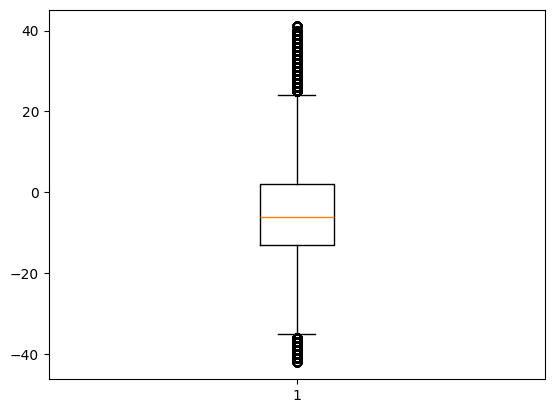

In [16]:
plt.boxplot(df["RetrasoLlegada"])
plt.show()

In [17]:
#Ponemos la fecha separada para posteriores analisis
df['DiaSemana'] = pd.to_datetime(df['Fecha']).dt.dayofweek
df['Mes'] = pd.to_datetime(df['Fecha']).dt.month

### 2.2 Utilice estadísticas, funciones de agregación y visualizaciones para responder a las siguientes preguntas

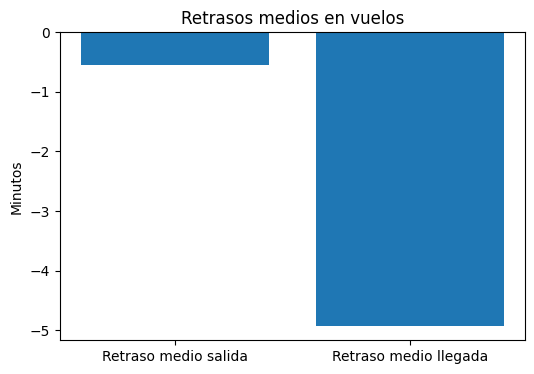

In [38]:
# ¿Cuáles son los retrasos medios de salida y llegada?
Retraso_medio_salida=df["RetrasoSalida"].mean()
Retraso_medio_llegada=df["RetrasoLlegada"].mean()
plt.figure(figsize=(6,4))
plt.bar(["Retraso medio salida", "Retraso medio llegada"],[Retraso_medio_salida, Retraso_medio_llegada])
plt.ylabel("Minutos")
plt.title("Retrasos medios en vuelos")
plt.show()

La media indica que los vuelos salen antes de su hora y llegan casi 5 minutos antes.

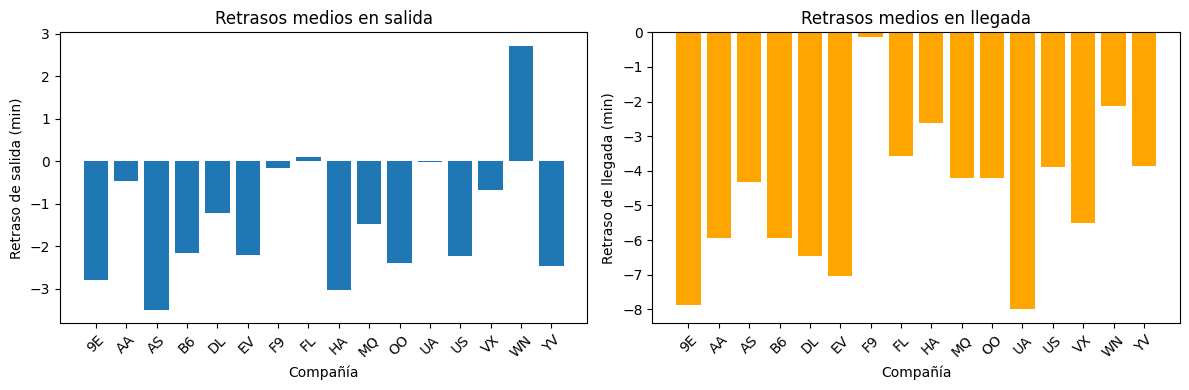

In [22]:
#¿Cómo se comportan las compañías aéreas en cuanto a los retrasos de llegada y salida medios se refiere?
retrasos_salida = df.groupby("Compañía")["RetrasoSalida"].mean()
retrasos_llegada = df.groupby("Compañía")["RetrasoLlegada"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].bar(retrasos_salida.index, retrasos_salida.values)
axes[0].set_ylabel("Retraso de salida (min)")
axes[0].set_xlabel("Compañía")
axes[0].set_title("Retrasos medios en salida")
axes[0].tick_params(axis='x', rotation=45)
axes[1].bar(retrasos_llegada.index, retrasos_llegada.values, color="orange")
axes[1].set_ylabel("Retraso de llegada (min)")
axes[1].set_xlabel("Compañía")
axes[1].set_title("Retrasos medios en llegada")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Parece que la mayoría de compañías salen antes menos la compaía WN que se retrasa 2 minutos. Sin embargo, todas las compañias suelen llegar antes de tiempo a destino.

In [23]:
#¿Qué aeropuerto tiene el mayor número de retrasos de salida?
retrasos=df.groupby("AeropuertoOrigen")["RetrasoSalida"].apply(lambda x: (x > 0).sum())
aeropuerto_max = retrasos.idxmax()
max_retrasos = retrasos.max()
print(f"Aeropuerto con más retrasos: {aeropuerto_max} con {max_retrasos} vuelos retrasados")

Aeropuerto con más retrasos: Hartsfield-Jackson Atlanta International con 4008 vuelos retrasados


In [24]:
#¿Podemos concluir que las salidas con retraso suelen provocar mayores retrasos en las llegadas que las salidas puntuales? ¿Existe una correlación?
correlacion = df["RetrasoSalida"].corr(df["RetrasoLlegada"])
correlacion

0.4890304631521905

In [25]:
df.columns

Index(['Fecha', 'Compañía', 'AeropuertoOrigenID', 'AeropuertoOrigen',
       'AeropuertoDestinoID', 'AeropuertoDestino', 'HoraSalidaProgramada',
       'RetrasoSalida', 'SalidaTarde', 'HoraLlegadaProgramada',
       'RetrasoLlegada', 'LlegadaTarde', 'Cancelado', 'DiaSemana', 'Mes'],
      dtype='object')

No podemos concluir con que las salidas con retraso suelen provocar mayores retrasos que las salidas puntuales porque la correlación es de 0.48. Por lo que la relación entre salida y llegada no es tan directa. Por lo que esa variable no conviene eliminarla.

In [26]:
#¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?
ruta_tarde=df.groupby(["AeropuertoOrigen",'AeropuertoDestino'])["LlegadaTarde"].sum()
aeropuertos=ruta_tarde.idxmax()
num_veces_tarde=ruta_tarde.max()
print(f"El trayecto entre {aeropuertos} tiene {num_veces_tarde} vuelos que llegan tarde.")

El trayecto entre ('LaGuardia', 'Hartsfield-Jackson Atlanta International') tiene 61 vuelos que llegan tarde.


## Bloque 2. Predicción de retrasos en vuelos

Desarrollar un modelo que permita predecir si un vuelo llegará tarde (LlegadaTarde = 1) en base a la información disponible antes del despegue.
<font color="#9E1B32">**(Justifica y explica todas tus decisiones: modelo elegido, sistema de evaluación del rendimiento del modelo, etc)**</font>

### Interpretación
* ¿Qué variables influyen más en que un vuelo llegue tarde?
* ¿Qué patrones se pueden extraer para prevenir estos retrasos?


### Modelo de predicción

In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score,f1_score,recall_score,precision_score

In [28]:
#Poner las columnas previas al despegue
df_modelo=df[["Fecha","Compañía",'AeropuertoOrigenID','AeropuertoDestinoID',"HoraSalidaProgramada"]]
y=df[['LlegadaTarde']]

In [29]:
#para la variable Fecha la dividiremos en 3 siendo dia mes y año porque el formato fecha no lo admiten los modelos
df_modelo=df_modelo.drop(["Fecha"],axis=1)

In [30]:
df_modelo

,Compañía,AeropuertoOrigenID,AeropuertoDestinoID,HoraSalidaProgramada
0,DL,15304,12478,1539
1,WN,14122,13232,710
2,AS,14747,11278,810
4,DL,13931,10397,545
6,WN,13796,12191,630
...,...,...,...,...
271932,WN,11292,12191,1855
271933,US,13930,14100,1345
271934,AA,11298,13204,1335
271935,VX,13204,12892,1730


In [31]:
#Transformamos la compañía en dummies
X = pd.get_dummies(df_modelo, columns=['Compañía'], drop_first=True)
X

,AeropuertoOrigenID,AeropuertoDestinoID,HoraSalidaProgramada,Compañía_AA,Compañía_AS,Compañía_B6,Compañía_DL,Compañía_EV,Compañía_F9,Compañía_FL,Compañía_HA,Compañía_MQ,Compañía_OO,Compañía_UA,Compañía_US,Compañía_VX,Compañía_WN,Compañía_YV
0,15304,12478,1539,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,14122,13232,710,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,14747,11278,810,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13931,10397,545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,13796,12191,630,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271932,11292,12191,1855,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
271933,13930,14100,1345,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
271934,11298,13204,1335,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271935,13204,12892,1730,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
#Entrenamiento y predicciones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # probabilidad clase 1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

C:\Users\Juan Carlos\AppData\Local\Temp\ipykernel_9848\373126137.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9182107053347655
Precision: 0.1251435132032147
Recall: 0.036309127248501
F1-score: 0.056287115930803
ROC-AUC: 0.5786456416667703


In [33]:
#Hacemos la matriz de confusión que nos indican los verdaderos positivos, falsos negativos ,falsos positivos y verdaderos negativos
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[40924   762]
 [ 2893   109]]


Las métricas indican que aunque el accuracy sea alto (92%), la matriz de confusión nos indica que acierta en 41181 verdaeros positivos pero los falsos positivos estan en torno a 2936, y los verdaderos negativos son muy pocos. Muy posiblmenete debido a la disparidad de clases ya que seguramente tendremos muchos vuelos que no llegan tarde, o sea 0 y pocos que sí llegan tarde, 1. Si se estabilizan las clases se podría obtener un modelo más preciso, sintetizando nuevos datos. Sin embargo, el f1 score que suele ser el más indicado para evaluar este tipo de casos es muy bajo, por lo que el modelo no parecer ser el mejor, hbaría que definir otras variables que tuvieran más peso o adoptar otro modelo.

## Interpretación de los resultados

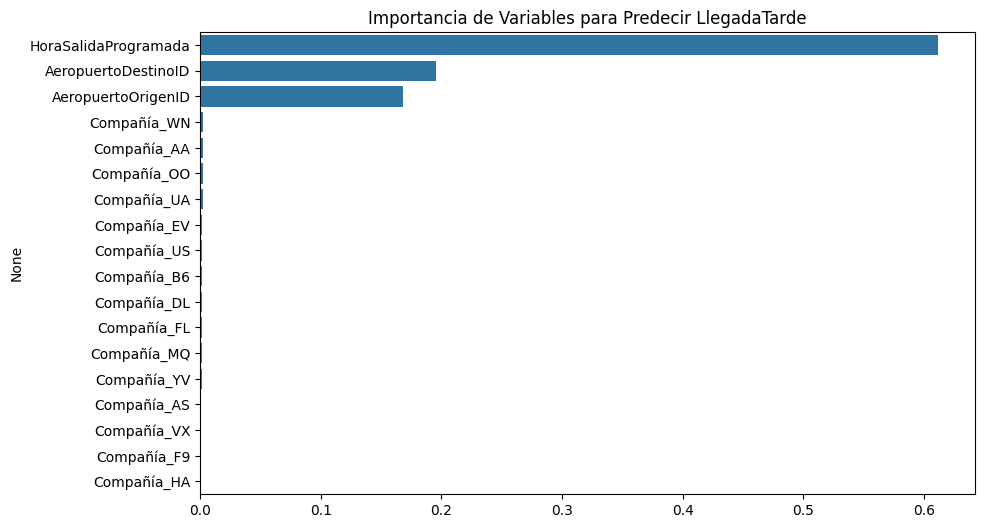

In [34]:
#¿Qué variables influyen más en que un vuelo llegue tarde?
import seaborn as sns
importancias = pd.Series(model.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importancias.values, y=importancias.index)
plt.title("Importancia de Variables para Predecir LlegadaTarde")
plt.show()

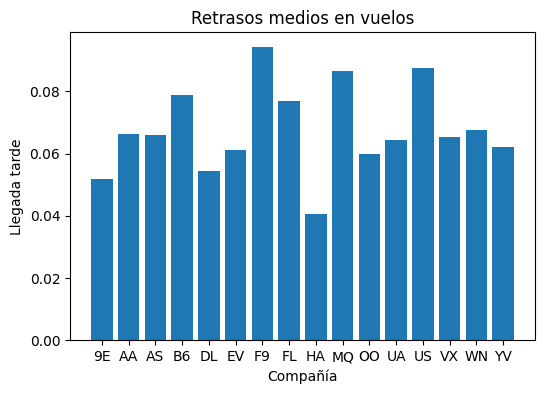

In [35]:
#¿Qué patrones se pueden extraer para prevenir estos retrasos?
df.groupby("Compañía")["LlegadaTarde"].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
plt.bar(df.groupby("Compañía")["LlegadaTarde"].mean().index,df.groupby("Compañía")["LlegadaTarde"].mean())
plt.ylabel("Llegada tarde")
plt.xlabel("Compañía")
plt.title("Retrasos medios en vuelos")
plt.show()
#Esto te dice la proporción que tienen las compañias de llegar tarde sus vuelos. Siendo F9 la que más y HA la que menos.

In [36]:
df.groupby("AeropuertoOrigen")["LlegadaTarde"].mean().sort_values(ascending=False)
#Retrasos por artopuerto de origen que dan sensación de estar más congestionados de gente.

AeropuertoOrigen
Charlotte Douglas International    0.100637
Chicago Midway International       0.096086
Luis Munoz Marin International     0.092401
Philadelphia International         0.090378
LaGuardia                          0.089755
                                     ...   
Sacramento International           0.041341
Ontario International              0.037852
Long Beach Airport                 0.033289
Tucson International               0.031536
Bob Hope                           0.029719
Name: LlegadaTarde, Length: 70, dtype: float64

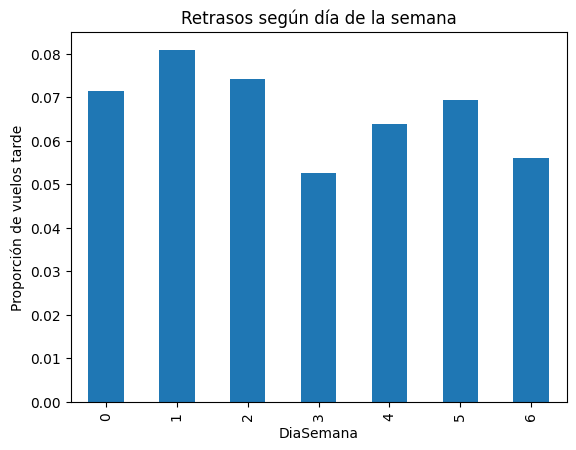

In [37]:
df.groupby("DiaSemana")["LlegadaTarde"].mean().plot(kind='bar')
plt.ylabel("Proporción de vuelos tarde")
plt.title("Retrasos según día de la semana")
plt.show()

En este último tenemos los retrasos segun el dia de la semana que apenas hay diferencias pero si que indica que el día 3 siendo el jueves es el día que menos retrasos tiene.
Estos serían los diferentes patrones que podrían sacarse del dataset.